Lab 08 
Done By Riya PC and Jyosna Philip

In [40]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

In [41]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [42]:

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Poly SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net1",
    "Neural Net2",
    "Neural Net3",
    "Neural Net4",
]


In [43]:

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),#linear
    SVC(kernel="poly", C=0.025, random_state=42),#linear
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(2,4, 2),random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(4,8, 2),random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(8,16, 2),random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(16,32, 2),random_state=42),

#     AdaBoostClassifier(algorithm="SAMME", random_state=42),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
]


In [44]:
import pandas as pd
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2
)


In [45]:

df=pd.DataFrame(X,columns=["feature1 ","feature 2"])
df["target"]=y
df.head()

,feature1,feature 2,target
0,1.300227,-0.785654,1
1,1.441844,-0.560086,1
2,-0.847924,-1.366213,0
3,-0.722150,-1.411294,0
4,-1.272215,0.259451,0


In [46]:

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


In [47]:

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]


In [48]:
import pandas as pd

Tried to get 7 features, using make_classifcation, but the visualisation wouldn't work.

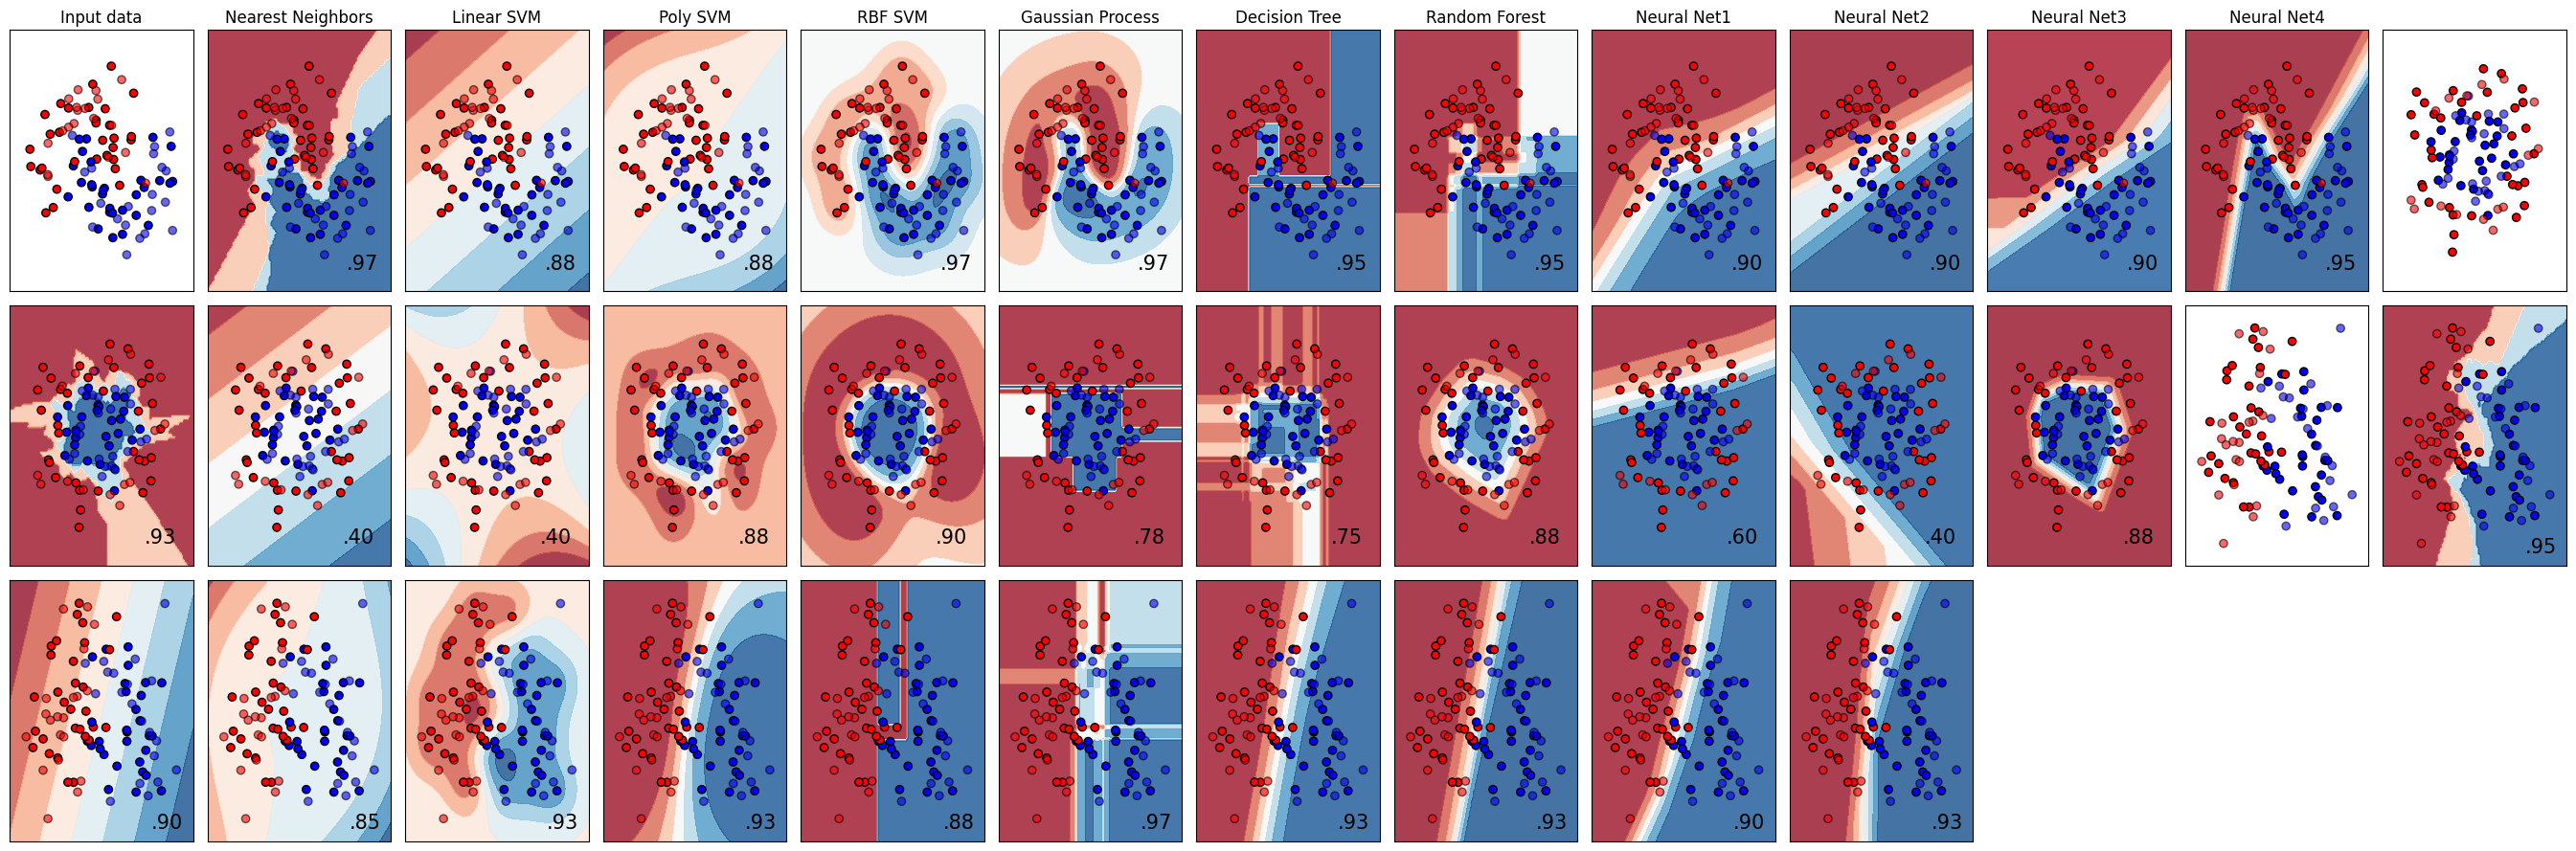

In [49]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers)+1, i) #i represent the subplot you are currently using
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers)+1, i) 

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

        ax = plt.subplot(len(datasets), len(classifiers)+1, i)
the +1 was removed to make the plots aligned, initialy
but when additional classsifers were added i had to put it back in to remove the error.

trying again with changed parameters.
kneighbours(3-->2)
svc: C->0.105 and 0.005
gamma=3 and c=1
dtree-> maxdepth-4
randomforest->max_depth and estimators changed
changed max_iter for all NNs

In [54]:

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Poly SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net1",
    "Neural Net2",
    "Neural Net3",
    "Neural Net4",
    "AdaBoost",
    "AdaBoost Same.R",
    "Naive Bayes",
    "QDA",
]


In [55]:

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.105, random_state=42),#linear
    SVC(kernel="poly", C=0.005, random_state=42),#linear
    SVC(gamma=3, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=4, random_state=42),
    RandomForestClassifier(
        max_depth=6, n_estimators=12, max_features=2, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1500, random_state=42),
    MLPClassifier(alpha=1, max_iter=1400, hidden_layer_sizes=(2,4, 2),random_state=42),
    MLPClassifier(alpha=1, max_iter=1300, hidden_layer_sizes=(4,8, 2),random_state=42),
    MLPClassifier(alpha=1, max_iter=1200, hidden_layer_sizes=(8,16, 2),random_state=42),
    MLPClassifier(alpha=1, max_iter=1100, hidden_layer_sizes=(16,32, 2),random_state=42),

    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    AdaBoostClassifier(algorithm="SAMME.R", random_state=42),

    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent th

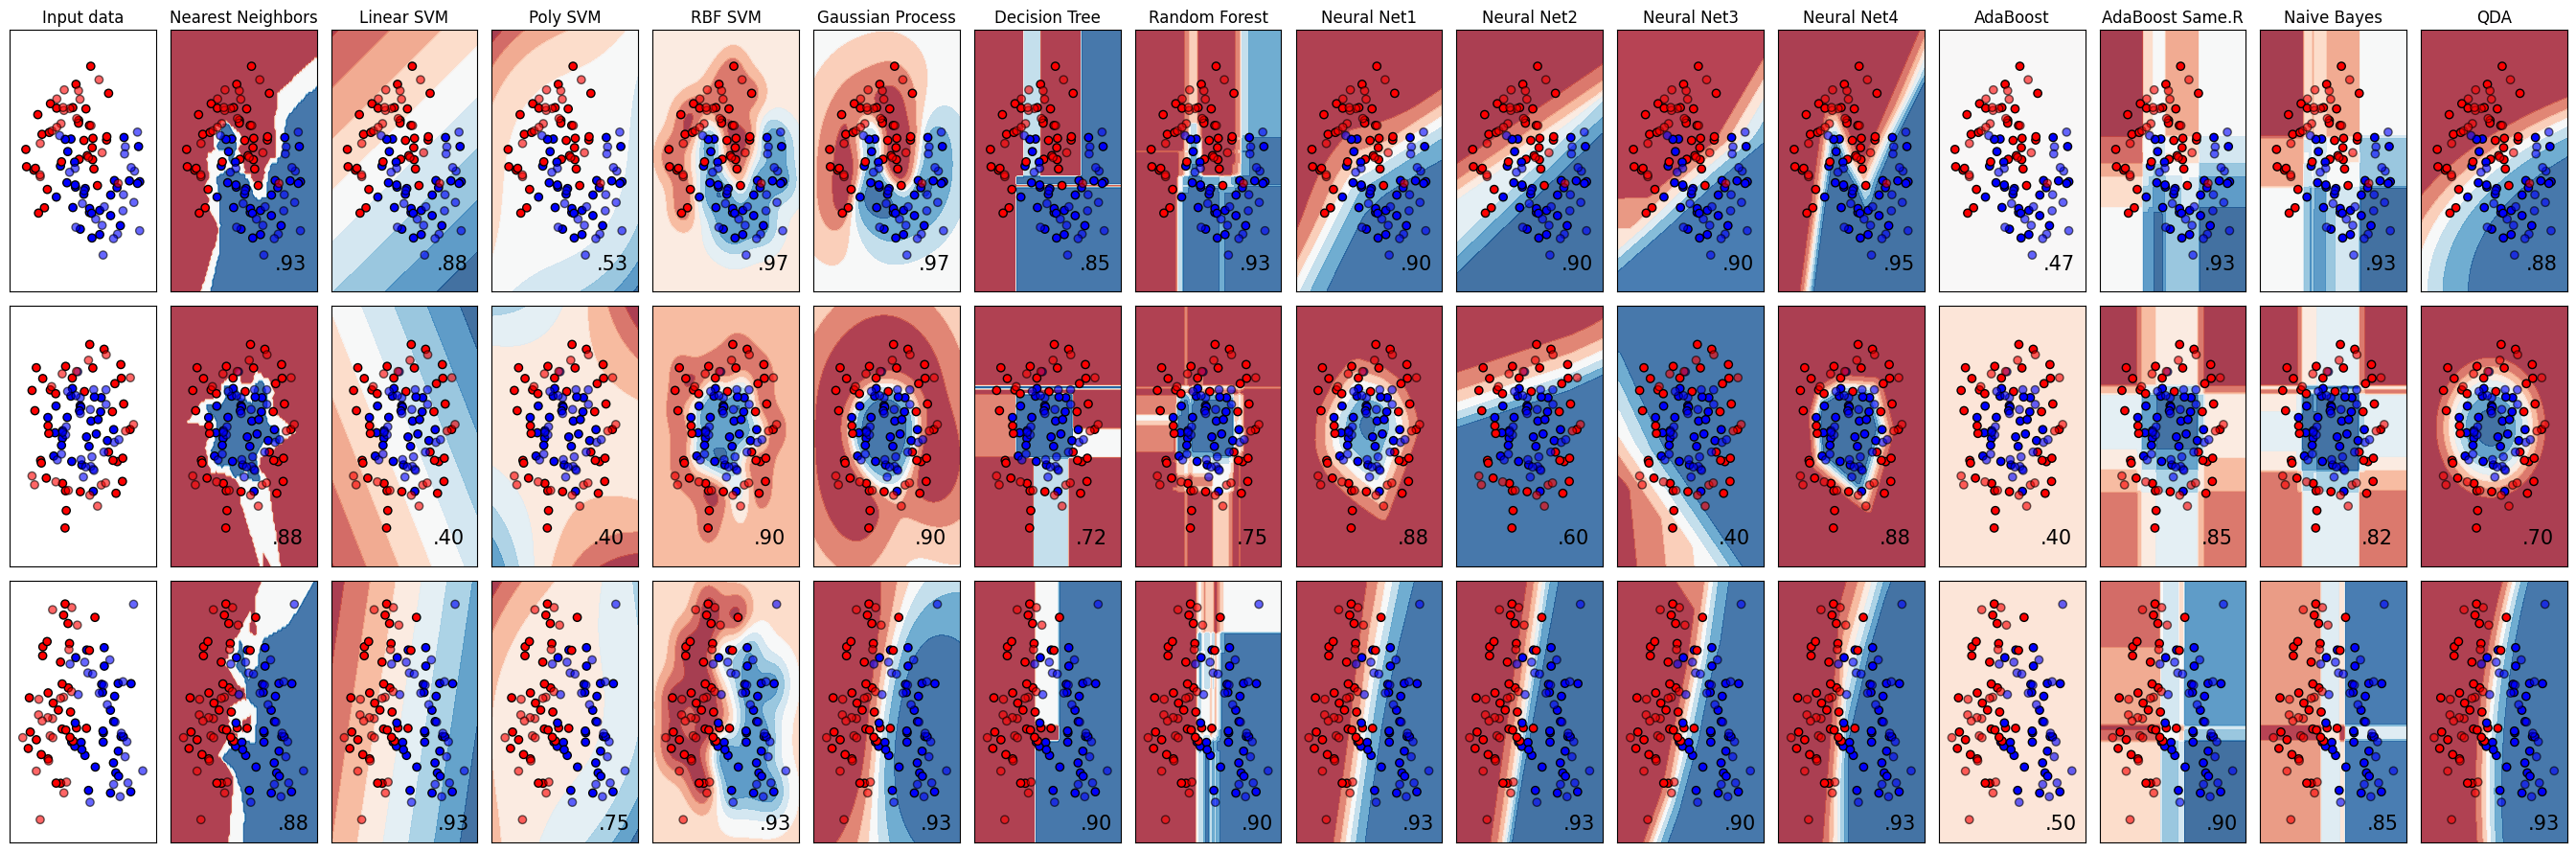

In [56]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers), i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers), i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

For first dataset:
- Nearest neigbour with k=3 was better
- linear svm didnt get better either way
- poly svm with c=0.025 was much better
- rbf svm had no change
- gaussian process had no change
- dtree with max depth 5 was better
- random forest with max depth 5 and 10 learner were better
- out of NNs neural net4 was the best with max_iter 1100

overall for 1st dataset, best models were rbf and gaussian process with 97% accuracy, which could be overfitting as well.
